In [ ]:
## immporting necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as npff
from statsmodels.tsa.seasonal import seasonal_decompose ## for  seasonal decomposition of data
from statsmodels.tsa.stattools import adfuller #(Augmented Dickey-Fuller test)
from statsmodels.tsa.ar_model import AutoReg ## for AR model
from statsmodels.tsa.arima.model import ARIMA ## for Arima model
from statsmodels.tsa.statespace.sarimax import SARIMAX ## for Sarimax model
from sklearn.metrics import mean_squared_error
from math import sqrt
import itertools
import warnings
warnings.filterwarnings("ignore")

In [ ]:
"""The data is the price history and trading volumes of the fifty stocks in the index NIFTY 50 from NSE (National Stock Exchange) India.
   All datasets are at a day-level with pricing and trading values split across .cvs files for each stock along with a metadata file with some macro-information about the stocks itself.
  The data spans from 1st January, 2000 to 30th April, 2021."""



'The data is the price history and trading volumes of the fifty stocks in the index NIFTY 50 from NSE (National Stock Exchange) India.\n   All datasets are at a day-level with pricing and trading values split across .cvs files for each stock along with a metadata file with some macro-information about the stocks itself.\n  The data spans from 1st January, 2000 to 30th April, 2021.'

In [ ]:
'''data_Set=https://www.kaggle.com/datasets/rohanrao/nifty50-stock-market-data
  nse_link = https://www.nseindia.com/ '''

'data_Set=https://www.kaggle.com/datasets/rohanrao/nifty50-stock-market-data\n  nse_link = https://www.nseindia.com/ '

In [ ]:
"""Official closing price (jo market band hone ke waqt settle hota hai, often VWAP ke aas paas)"""



'Official closing price (jo market band hone ke waqt settle hota hai, often VWAP ke aas paas)'

Loading Data

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/ADANIPORTS.csv')

In [ ]:
df

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.00,959.0,962.90,984.72,27294366,2.687719e+15,NaN,9859619,0.3612
1,2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.00,885.0,893.90,941.38,4581338,4.312765e+14,NaN,1453278,0.3172
2,2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.00,887.0,884.20,888.09,5124121,4.550658e+14,NaN,1069678,0.2088
3,2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.00,929.0,921.55,929.17,4609762,4.283257e+14,NaN,1260913,0.2735
4,2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.00,980.0,969.30,965.65,2977470,2.875200e+14,NaN,816123,0.2741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3317,2021-04-26,ADANIPORTS,EQ,725.35,733.00,739.65,728.90,729.2,730.75,733.25,9390549,6.885658e+14,116457.0,838079,0.0892
3318,2021-04-27,ADANIPORTS,EQ,730.75,735.00,757.50,727.35,748.6,749.15,747.67,20573107,1.538191e+15,236896.0,1779639,0.0865
3319,2021-04-28,ADANIPORTS,EQ,749.15,755.00,760.00,741.10,743.4,746.25,751.02,11156977,8.379106e+14,130847.0,1342353,0.1203
3320,2021-04-29,ADANIPORTS,EQ,746.25,753.20,765.85,743.40,746.4,746.75,753.06,13851910,1.043139e+15,153293.0,1304895,0.0942


In [ ]:
df['Date'].dtype

dtype('O')

In [ ]:
df['Date']  = pd.to_datetime(df['Date'])

In [ ]:
df

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.00,959.0,962.90,984.72,27294366,2.687719e+15,NaN,9859619,0.3612
1,2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.00,885.0,893.90,941.38,4581338,4.312765e+14,NaN,1453278,0.3172
2,2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.00,887.0,884.20,888.09,5124121,4.550658e+14,NaN,1069678,0.2088
3,2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.00,929.0,921.55,929.17,4609762,4.283257e+14,NaN,1260913,0.2735
4,2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.00,980.0,969.30,965.65,2977470,2.875200e+14,NaN,816123,0.2741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3317,2021-04-26,ADANIPORTS,EQ,725.35,733.00,739.65,728.90,729.2,730.75,733.25,9390549,6.885658e+14,116457.0,838079,0.0892
3318,2021-04-27,ADANIPORTS,EQ,730.75,735.00,757.50,727.35,748.6,749.15,747.67,20573107,1.538191e+15,236896.0,1779639,0.0865
3319,2021-04-28,ADANIPORTS,EQ,749.15,755.00,760.00,741.10,743.4,746.25,751.02,11156977,8.379106e+14,130847.0,1342353,0.1203
3320,2021-04-29,ADANIPORTS,EQ,746.25,753.20,765.85,743.40,746.4,746.75,753.06,13851910,1.043139e+15,153293.0,1304895,0.0942


In [ ]:
df['Date'].dtype

dtype('<M8[ns]')

Univariate Analysis

In [ ]:
df

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.00,959.0,962.90,984.72,27294366,2.687719e+15,NaN,9859619,0.3612
1,2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.00,885.0,893.90,941.38,4581338,4.312765e+14,NaN,1453278,0.3172
2,2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.00,887.0,884.20,888.09,5124121,4.550658e+14,NaN,1069678,0.2088
3,2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.00,929.0,921.55,929.17,4609762,4.283257e+14,NaN,1260913,0.2735
4,2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.00,980.0,969.30,965.65,2977470,2.875200e+14,NaN,816123,0.2741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3317,2021-04-26,ADANIPORTS,EQ,725.35,733.00,739.65,728.90,729.2,730.75,733.25,9390549,6.885658e+14,116457.0,838079,0.0892
3318,2021-04-27,ADANIPORTS,EQ,730.75,735.00,757.50,727.35,748.6,749.15,747.67,20573107,1.538191e+15,236896.0,1779639,0.0865
3319,2021-04-28,ADANIPORTS,EQ,749.15,755.00,760.00,741.10,743.4,746.25,751.02,11156977,8.379106e+14,130847.0,1342353,0.1203
3320,2021-04-29,ADANIPORTS,EQ,746.25,753.20,765.85,743.40,746.4,746.75,753.06,13851910,1.043139e+15,153293.0,1304895,0.0942


In [ ]:
df.set_index('Date',inplace = True) ## used to put  Date column in Index

In [ ]:
df.head(10)

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.0,959.00,962.90,984.72,27294366,2.687719e+15,NaN,9859619,0.3612
2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.0,885.00,893.90,941.38,4581338,4.312765e+14,NaN,1453278,0.3172
2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.0,887.00,884.20,888.09,5124121,4.550658e+14,NaN,1069678,0.2088
2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.0,929.00,921.55,929.17,4609762,4.283257e+14,NaN,1260913,0.2735
2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.0,980.00,969.30,965.65,2977470,2.875200e+14,NaN,816123,0.2741
2007-12-04,MUNDRAPORT,EQ,969.30,985.00,1056.00,976.0,1049.00,1041.45,1015.39,4849250,4.923867e+14,NaN,1537667,0.3171
2007-12-05,MUNDRAPORT,EQ,1041.45,1061.00,1099.50,1050.0,1084.00,1082.45,1082.79,2848209,3.084010e+14,NaN,904260,0.3175
2007-12-06,MUNDRAPORT,EQ,1082.45,1089.00,1109.70,1051.0,1090.10,1081.30,1087.03,1749516,1.901771e+14,NaN,825691,0.4720
2007-12-07,MUNDRAPORT,EQ,1081.30,1100.00,1134.00,1078.0,1100.00,1102.40,1106.57,2247904,2.487465e+14,NaN,697763,0.3104


In [ ]:
df1 = df['Close'] ## Dataset is already in Buisness Days of Nifty (Monday to Friday)

In [ ]:
df1.isnull().sum() ## no nan values in close column

np.int64(0)

In [ ]:
df1

,Close
Date,
2007-11-27,962.90
2007-11-28,893.90
2007-11-29,884.20
2007-11-30,921.55
2007-12-03,969.30
...,...
2021-04-26,730.75
2021-04-27,749.15
2021-04-28,746.25


Plotting the graph

<Axes: xlabel='Date'>

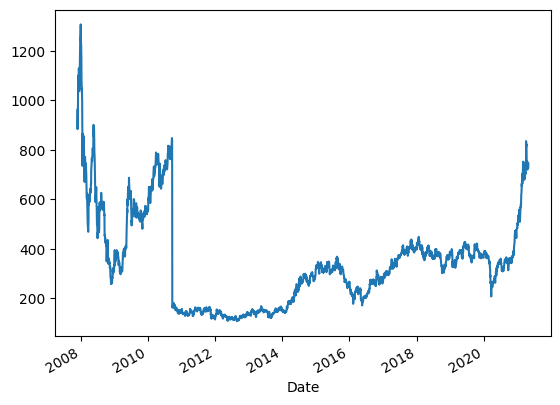

In [ ]:
df1.plot() ## using pandas

<Axes: xlabel='Date'>

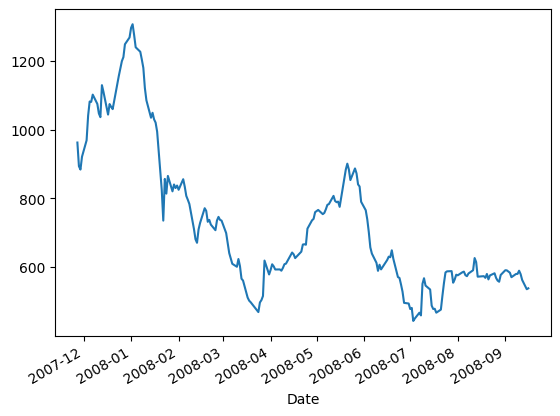

In [ ]:
df1[:200].plot() ## zooming

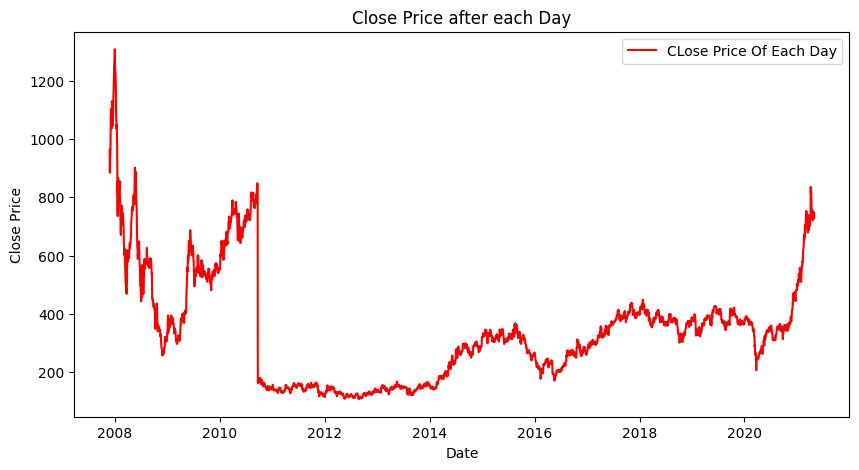

In [ ]:
plt.figure(figsize = (10,5))
plt.plot(df1,label = "CLose Price Of Each Day" , color = 'red')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.title('Close Price after each Day')
plt.show()

Exploring Time Series

In [ ]:
df1.shape

(3322,)

In [ ]:
df1.size

3322

In [ ]:
df1.__sizeof__() ## space occupied in memory

53152

Descriptive Statistics

In [ ]:
df1.describe(include='all')

,Close
count,3322.000000
mean,344.201626
std,193.045886
min,108.000000
25%,164.312500
50%,324.700000
75%,400.912500
max,1307.450000


Querying By Time

In [ ]:
print(df1['2007-12'])

Date
2007-12-03     969.30
2007-12-04    1041.45
2007-12-05    1082.45
2007-12-06    1081.30
2007-12-07    1102.40
2007-12-10    1075.40
2007-12-11    1047.65
2007-12-12    1036.80
2007-12-13    1129.95
2007-12-14    1110.50
2007-12-17    1044.25
2007-12-18    1074.95
2007-12-19    1066.90
2007-12-20    1060.20
2007-12-24    1156.80
2007-12-26    1199.90
2007-12-27    1211.65
2007-12-28    1249.10
2007-12-31    1268.80
Name: Close, dtype: float64


Smoothing The Data for Better Understanding

In [ ]:
type(df1)

pandas.core.series.Series

In [ ]:
df['rolling_mean_30'] = df1.rolling(window=30).mean() # 30 day rolling mean for simple moving average
df['rolling_mean_90'] = df1.rolling(window=90).mean() # 90 say rolling mean for simple moving average

In [ ]:
df1

,Close
Date,
2007-11-27,962.90
2007-11-28,893.90
2007-11-29,884.20
2007-11-30,921.55
2007-12-03,969.30
...,...
2021-04-26,730.75
2021-04-27,749.15
2021-04-28,746.25


In [ ]:
df

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,rolling_mean_30,rolling_mean_90
Date,,,,,,,,,,,,,,,,
2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.00,959.0,962.90,984.72,27294366,2.687719e+15,NaN,9859619,0.3612,NaN,NaN
2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.00,885.0,893.90,941.38,4581338,4.312765e+14,NaN,1453278,0.3172,NaN,NaN
2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.00,887.0,884.20,888.09,5124121,4.550658e+14,NaN,1069678,0.2088,NaN,NaN
2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.00,929.0,921.55,929.17,4609762,4.283257e+14,NaN,1260913,0.2735,NaN,NaN
2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.00,980.0,969.30,965.65,2977470,2.875200e+14,NaN,816123,0.2741,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-26,ADANIPORTS,EQ,725.35,733.00,739.65,728.90,729.2,730.75,733.25,9390549,6.885658e+14,116457.0,838079,0.0892,735.953333,620.615000
2021-04-27,ADANIPORTS,EQ,730.75,735.00,757.50,727.35,748.6,749.15,747.67,20573107,1.538191e+15,236896.0,1779639,0.0865,735.900000,623.757778
2021-04-28,ADANIPORTS,EQ,749.15,755.00,760.00,741.10,743.4,746.25,751.02,11156977,8.379106e+14,130847.0,1342353,0.1203,735.930000,626.860556


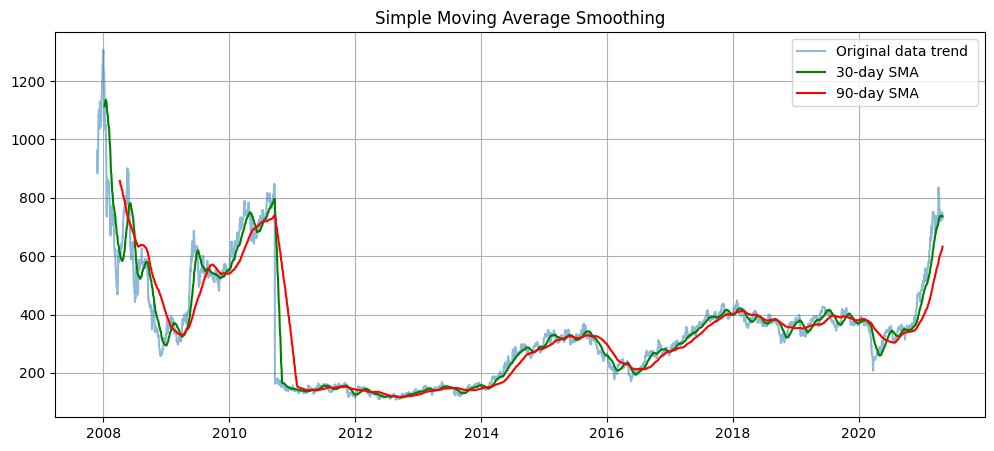

In [ ]:
plt.figure(figsize=(12, 5))
plt.plot(df1, label='Original data trend ', alpha=0.5)
plt.plot(df['rolling_mean_30'], label='30-day SMA', color='green')
plt.plot(df['rolling_mean_90'], label='90-day SMA', color='red')
plt.legend()
plt.title('Simple Moving Average Smoothing')
plt.grid(True)
plt.show()

Seasonal Decomposition

In [ ]:
multiplicative_decompose = seasonal_decompose(df1,model = 'multiplicative',period = 252) ## taking period = 252 as there are 252 trading days in a year
trend = multiplicative_decompose.trend
seasonal = multiplicative_decompose.seasonal
residual = multiplicative_decompose.resid

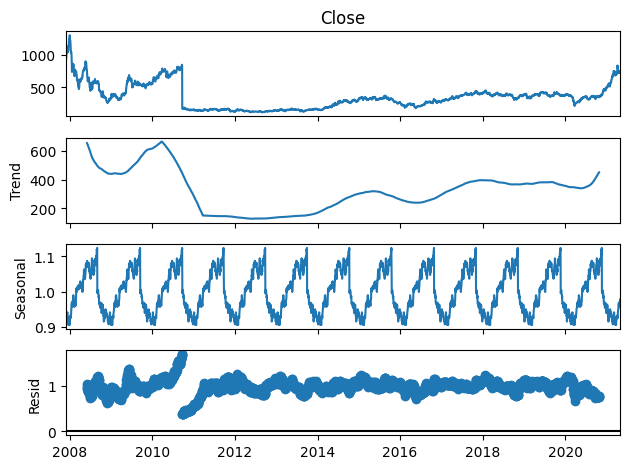

In [ ]:
result = multiplicative_decompose.plot()

ADF Test (Used to Check whether the data is stationary or not)

In [ ]:
adf_test = adfuller(df1)
print('ADF Test Result:')
print(f'ADF statistic : {round(adf_test[0],3)}')
print(f'p-value : {round(adf_test[1],3)}')
print('critical value')
for key,value in adf_test[4].items():
    print(f'{key}:{round(value,3)}')

ADF Test Result:
ADF statistic : -3.473
p-value : 0.009
critical value
1%:-3.432
5%:-2.862
10%:-2.567


In [ ]:
#check the results
if adf_test[1] <= 0.05:
  print("Time Series Data is Stationary")
else:
  print("Time Series Data is Non-Stationary, Differencing is required")

Time Series Data is Stationary


As Dataset is Stationary Already,hence no need of differencing

Finding Best P,D,Q values for Arima model

In [ ]:
#Split data into training and test
train_size=int(len(df1)*0.8)
train,test=df1.iloc[:train_size],df1.iloc[train_size:]

In [ ]:
p_values = range(0, 4)
d_values = range(0, 3)
q_values = range(0, 4)

def evaluate_arima_model(series, arima_order):
    try:
        model = ARIMA(series, order=arima_order)
        model_fit = model.fit()
        return model_fit.aic
    except:
        return np.inf

best_score, best_cfg = float("inf"), None
results = []

for p in p_values:
    for d in d_values:
        for q in q_values:
            order = (p, d, q)
            aic = evaluate_arima_model(df1, order)
            results.append((order, aic))
            if aic < best_score:
                best_score, best_cfg = aic, order
            print(f"Tested ARIMA{order} AIC={aic:.2f}")

print(f"\nBest ARIMA model: ARIMA{best_cfg} with AIC={best_score:.2f}")


Tested ARIMA(0, 0, 0) AIC=44397.32
Tested ARIMA(0, 0, 1) AIC=40176.43
Tested ARIMA(0, 0, 2) AIC=37043.25
Tested ARIMA(0, 0, 3) AIC=34931.09
Tested ARIMA(0, 1, 0) AIC=28088.96
Tested ARIMA(0, 1, 1) AIC=28085.81
Tested ARIMA(0, 1, 2) AIC=28087.48
Tested ARIMA(0, 1, 3) AIC=28088.26
Tested ARIMA(0, 2, 0) AIC=30238.98
Tested ARIMA(0, 2, 1) AIC=28091.00
Tested ARIMA(0, 2, 2) AIC=28087.87
Tested ARIMA(0, 2, 3) AIC=28089.54
Tested ARIMA(1, 0, 0) AIC=28104.94
Tested ARIMA(1, 0, 1) AIC=28101.40
Tested ARIMA(1, 0, 2) AIC=28102.95
Tested ARIMA(1, 0, 3) AIC=28103.50
Tested ARIMA(1, 1, 0) AIC=28085.72
Tested ARIMA(1, 1, 1) AIC=28087.39
Tested ARIMA(1, 1, 2) AIC=28088.20
Tested ARIMA(1, 1, 3) AIC=28085.86
Tested ARIMA(1, 2, 0) AIC=29353.12
Tested ARIMA(1, 2, 1) AIC=28087.77
Tested ARIMA(1, 2, 2) AIC=28088.93
Tested ARIMA(1, 2, 3) AIC=28090.25
Tested ARIMA(2, 0, 0) AIC=28101.28
Tested ARIMA(2, 0, 1) AIC=28102.82
Tested ARIMA(2, 0, 2) AIC=28103.86
Tested ARIMA(2, 0, 3) AIC=28101.08
Tested ARIMA(2, 1, 0

In [ ]:
model = ARIMA(df1, order=best_cfg)
model_fit = model.fit()

In [ ]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 3322
Model:                 ARIMA(3, 1, 2)   Log Likelihood              -14028.361
Date:                Tue, 03 Jun 2025   AIC                          28068.722
Time:                        12:46:08   BIC                          28105.370
Sample:                             0   HQIC                         28081.836
                               - 3322                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9319      0.013    -74.362      0.000      -0.956      -0.907
ar.L2         -0.9235      0.014    -63.702      0.000      -0.952      -0.895
ar.L3          0.0597      0.010      6.237      0.0

In [ ]:
forecast = model_fit.forecast(steps=len(test))
forecast.index = test.index

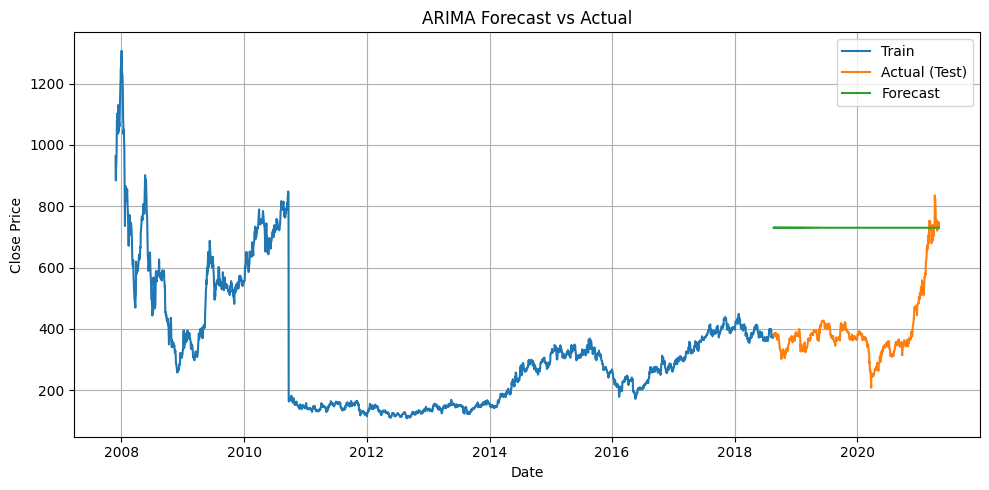

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Actual (Test)')
plt.plot(forecast.index, forecast, label='Forecast')
plt.title('ARIMA Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
rmse = np.sqrt(mean_squared_error(test, forecast))
print("RMSE:", rmse)

RMSE: 349.72903393617366


In [ ]:
# Forecast next 90 business days
forecast = model_fit.get_forecast(steps=90)
forecast_index = pd.date_range(df1.index[-1], periods=90, freq='B')
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()


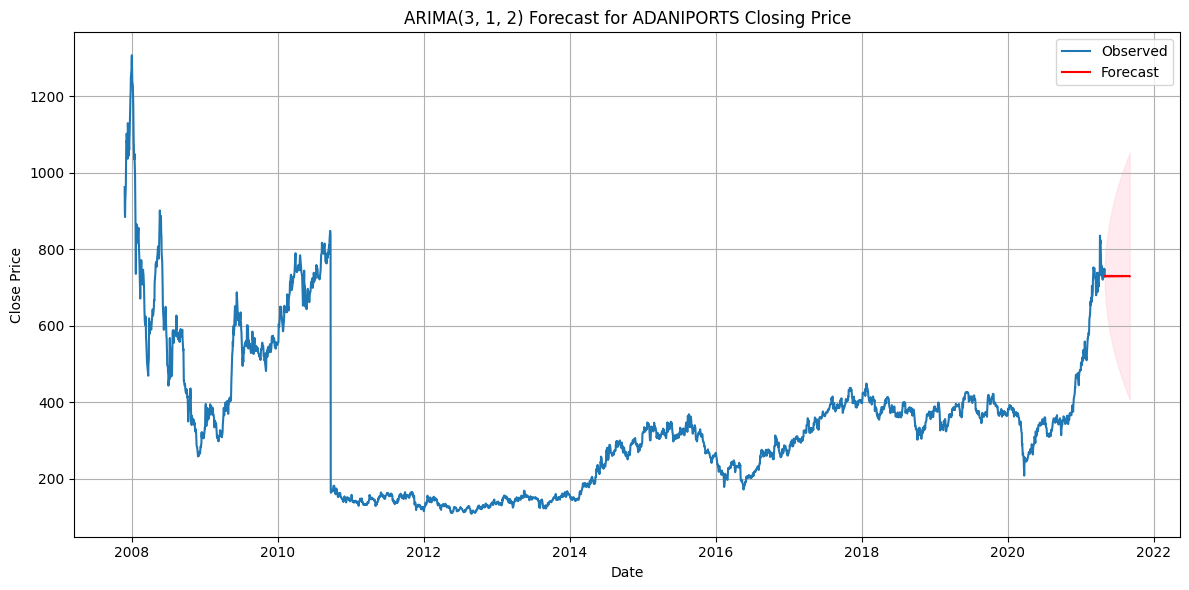

In [ ]:
# Plot forecast
plt.figure(figsize=(12, 6))
plt.plot(df1, label='Observed')
plt.plot(forecast_index, forecast_mean, label='Forecast', color='red')
plt.fill_between(forecast_index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1],
                 color='pink', alpha=0.3)
plt.title(f'ARIMA{best_cfg} Forecast for ADANIPORTS Closing Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Sarima Model

In [ ]:
p = d = q = range(0, 3)
P = D = Q = range(0, 2)
seasonal_period = 5  # weekly pattern (5 business days)

# Generate all combinations of p,d,q and seasonal P,D,Q
pdq = list(itertools.product(p, d, q))
seasonal_pdq = list(itertools.product(P, D, Q, [seasonal_period]))

best_aic = np.inf
best_params = None

for param in pdq:
    for seasonal_param in seasonal_pdq:
        try:
            model = SARIMAX(df1,
                            order=param,
                            seasonal_order=seasonal_param,
                            enforce_stationarity=False,
                            enforce_invertibility=False)
            results = model.fit(disp=False)
            if results.aic < best_aic:
                best_aic = results.aic
                best_params = (param, seasonal_param)
            print(f"SARIMA{param}x{seasonal_param} - AIC:{results.aic:.2f}")
        except Exception as e:

            continue

# Check if best_params was updated before trying to access its elements
if best_params is not None:
    print(f"\nBest SARIMA model: SARIMA{best_params[0]}x{best_params[1]} - AIC: {best_aic:.2f}")
else:
    print("\nNo suitable SARIMA model found for the given parameter ranges.")

SARIMA(0, 0, 0)x(0, 0, 0, 5) - AIC:49127.12
SARIMA(0, 0, 0)x(0, 0, 1, 5) - AIC:44875.58
SARIMA(0, 0, 0)x(0, 1, 0, 5) - AIC:33591.81
SARIMA(0, 0, 0)x(0, 1, 1, 5) - AIC:33466.21
SARIMA(0, 0, 0)x(1, 0, 0, 5) - AIC:33593.45
SARIMA(0, 0, 0)x(1, 0, 1, 5) - AIC:33581.94
SARIMA(0, 0, 0)x(1, 1, 0, 5) - AIC:33475.35
SARIMA(0, 0, 0)x(1, 1, 1, 5) - AIC:33468.09
SARIMA(0, 0, 1)x(0, 0, 0, 5) - AIC:44701.55
SARIMA(0, 0, 1)x(0, 0, 1, 5) - AIC:41369.20
SARIMA(0, 0, 1)x(0, 1, 0, 5) - AIC:31397.94
SARIMA(0, 0, 1)x(0, 1, 1, 5) - AIC:31246.47
SARIMA(0, 0, 1)x(1, 0, 0, 5) - AIC:31433.93
SARIMA(0, 0, 1)x(1, 0, 1, 5) - AIC:31325.03
SARIMA(0, 0, 1)x(1, 1, 0, 5) - AIC:31264.92
SARIMA(0, 0, 1)x(1, 1, 1, 5) - AIC:31247.76
SARIMA(0, 0, 2)x(0, 0, 0, 5) - AIC:41056.45
SARIMA(0, 0, 2)x(0, 0, 1, 5) - AIC:37442.78
SARIMA(0, 0, 2)x(0, 1, 0, 5) - AIC:30294.18
SARIMA(0, 0, 2)x(0, 1, 1, 5) - AIC:30619.70
SARIMA(0, 0, 2)x(1, 0, 0, 5) - AIC:30332.88
SARIMA(0, 0, 2)x(1, 0, 1, 5) - AIC:30101.00
SARIMA(0, 0, 2)x(1, 1, 0, 5) - A

In [ ]:
model = SARIMAX(train,
                order=(1,2,2),              # non-seasonal part (p,d,q)
                seasonal_order=(0,1,1,5),  # seasonal part (P,D,Q,s) — s=12 for monthly seasonality or s = 5 for 5 working days
                enforce_stationarity=False,
                enforce_invertibility=False)

In [ ]:
model_fit = model.fit(disp=False)

In [ ]:
forecast = model_fit.forecast(steps=len(test))
forecast.index = test.index

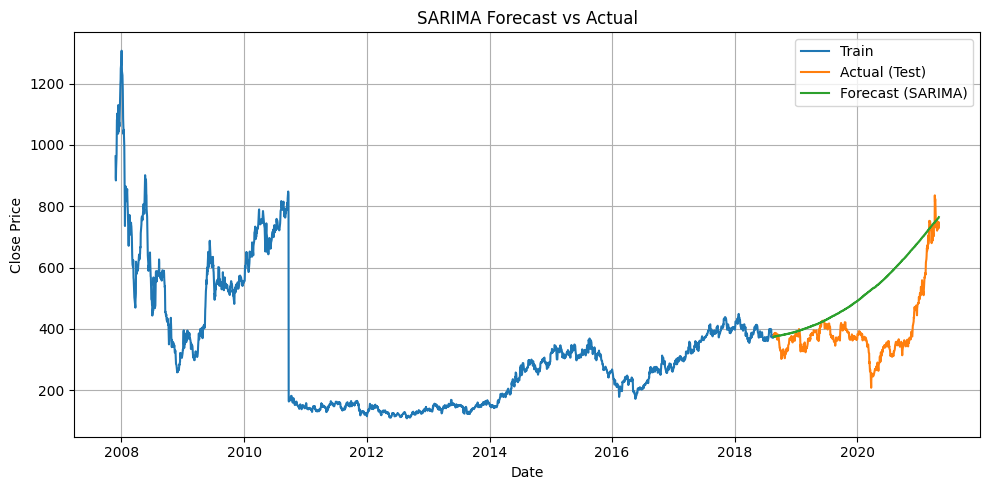

In [ ]:
# plot actual vs forecast
plt.figure(figsize=(10,5))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Actual (Test)')
plt.plot(forecast.index, forecast, label='Forecast (SARIMA)')
plt.title('SARIMA Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
## calculate rmse
rmse = np.sqrt(mean_squared_error(test, forecast))
print("SARIMA RMSE:", rmse)

SARIMA RMSE: 156.6665938645921


In [ ]:
model = SARIMAX(df1 , order=best_params[0],
                seasonal_order=best_params[1],
                enforce_stationarity=False,)

In [ ]:
results = model.fit()

In [ ]:
# Forecast next 30 business days
forecast_steps = 30
# Use df1.index[-1] to get the last date of your time series data
forecast_index = pd.date_range(start=df1.index[-1], periods=forecast_steps + 1, freq='B')[1:]
forecast = results.get_forecast(steps=forecast_steps)
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

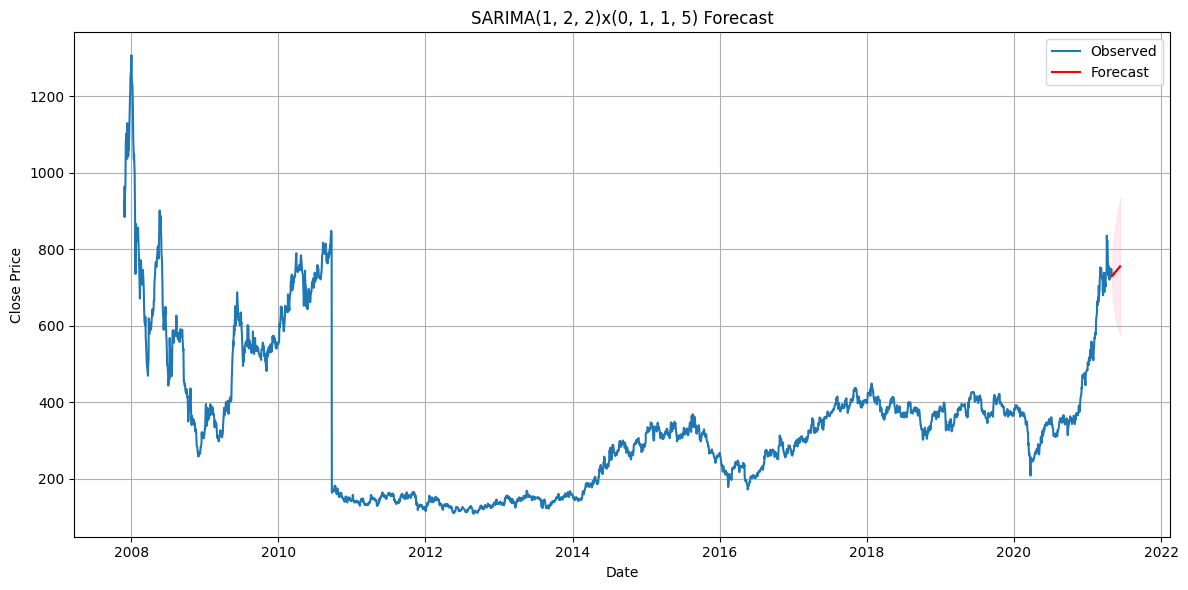

In [ ]:
# Plot forecast
plt.figure(figsize=(12, 6))
plt.plot(df1, label='Observed')
plt.plot(forecast_index, forecast_mean, label='Forecast', color='red')
plt.fill_between(forecast_index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink', alpha=0.3)
# Use the correct variable name 'best_params'
plt.title(f"SARIMA{best_params[0]}x{best_params[1]} Forecast")
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

FB Prophet Model

In [ ]:
from prophet import Prophet

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/ADANIPORTS.csv')

In [ ]:
df_prophet = df[['Date', 'Close']].rename(columns={'Date': 'ds', 'Close': 'y'})
df_prophet = df_prophet.dropna()

In [ ]:
# Initialize and fit the model
model = Prophet(daily_seasonality=True)  # You can also try weekly or yearly_seasonality=True
model.fit(df_prophet)


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp_oo1ix8/t7smvr26.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp_oo1ix8/3obsgzfk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79148', 'data', 'file=/tmp/tmpp_oo1ix8/t7smvr26.json', 'init=/tmp/tmpp_oo1ix8/3obsgzfk.json', 'output', 'file=/tmp/tmpp_oo1ix8/prophet_modeloqhttiyg/prophet_model-20250603130031.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:00:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:00:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


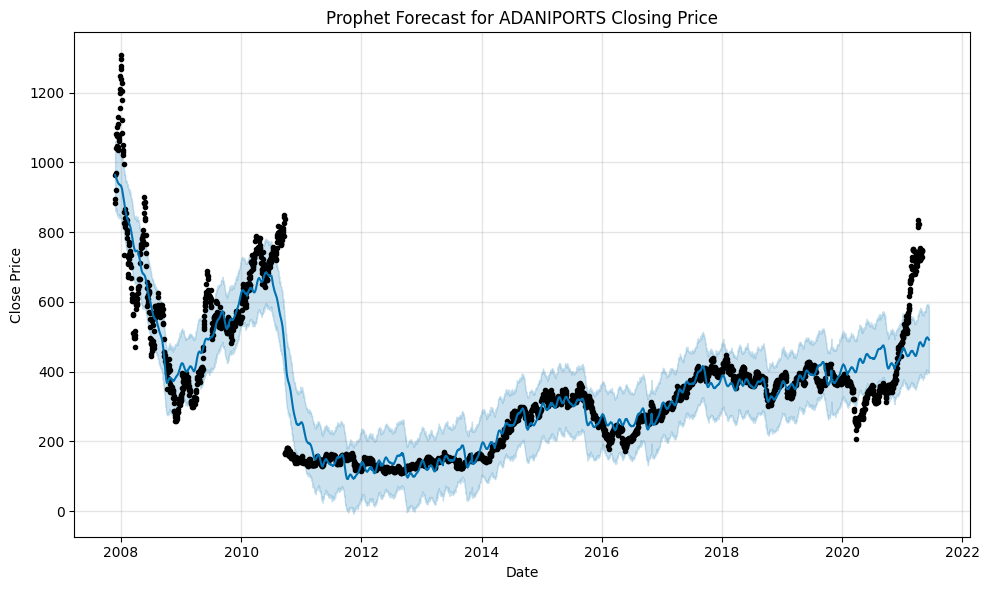

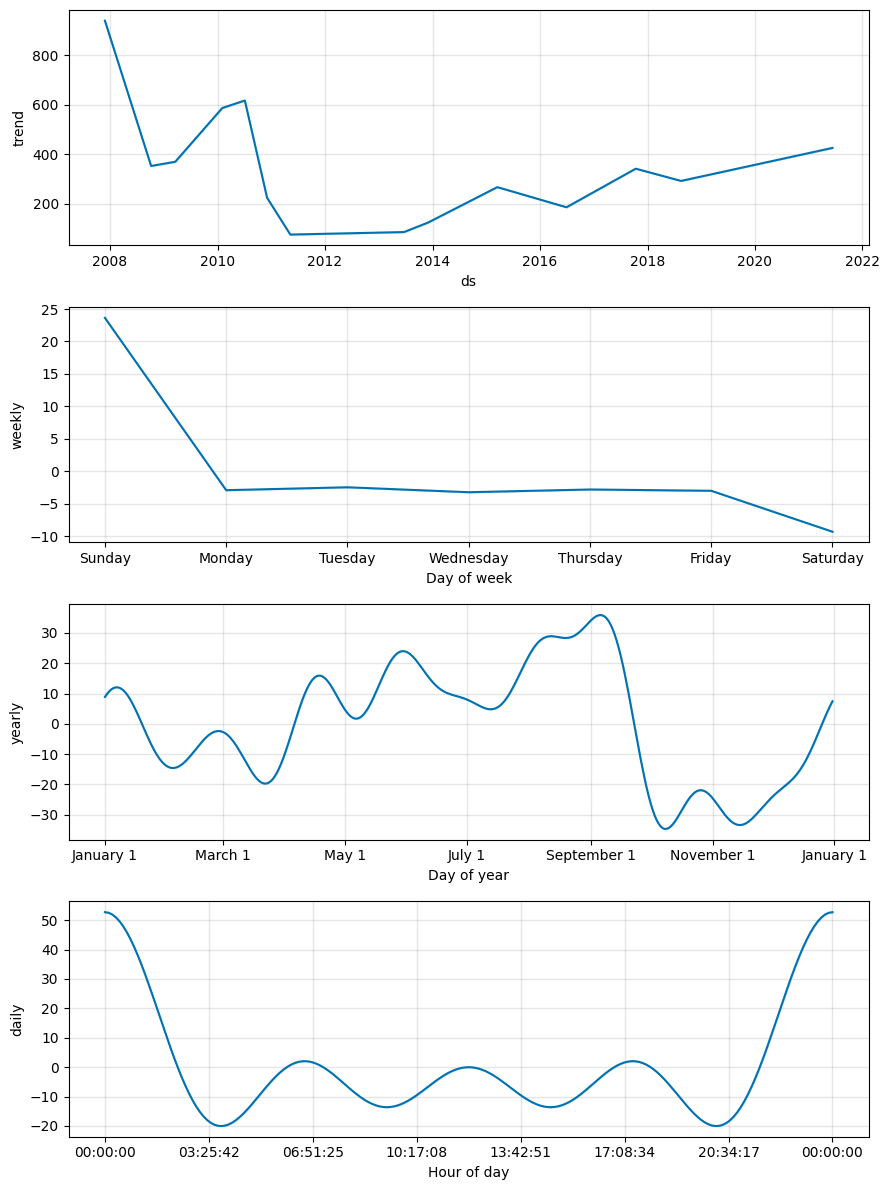

In [ ]:
# Create a dataframe with future dates (e.g., next 30 business days)
future = model.make_future_dataframe(periods=30, freq='B')

# Forecast
forecast = model.predict(future)

# Plot forecast
fig1 = model.plot(forecast)
plt.title("Prophet Forecast for ADANIPORTS Closing Price")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot forecast components
fig2 = model.plot_components(forecast)
plt.tight_layout()
plt.show()


In [ ]:
# Show forecasted values
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(10)


,ds,yhat,yhat_lower,yhat_upper
3342,2021-05-31,497.859962,403.513565,592.367545
3343,2021-06-01,498.217434,401.197667,592.082962
3344,2021-06-02,497.215121,399.402229,588.155283
3345,2021-06-03,497.260240,399.358487,595.014376
3346,2021-06-04,496.568820,403.192886,586.431690
3347,2021-06-07,494.668370,397.102032,592.458708
3348,2021-06-08,494.349821,400.440036,586.541843
3349,2021-06-09,492.801715,396.387759,589.245949
3350,2021-06-10,492.435147,404.421256,583.928767
3351,2021-06-11,491.466287,395.352683,584.268979


In [ ]:
forecast['ds'] = pd.to_datetime(forecast['ds'])

# Filter the forecast to include only the dates present in the test set index
forecast_aligned = forecast[forecast['ds'].isin(test.index)]

# Check if the lengths match after filtering
if len(test) == len(forecast_aligned):
    rmse = np.sqrt(mean_squared_error(test, forecast_aligned['yhat']))
    print("Prophet RMSE:", rmse)
else:
    print(f"Error: Length of test set ({len(test)}) does not match length of aligned forecast ({len(forecast_aligned)}). Cannot calculate RMSE.")


Prophet RMSE: 98.16802534824379


RNN Model|

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [ ]:
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df1.values.reshape(-1, 1)) # Reshape df1 to a 2D array for the scaler

In [ ]:
def create_sequences(data, seq_len):
    X, y = [], []
    for i in range(len(data) - seq_len):
        X.append(data[i:i+seq_len])
        y.append(data[i+seq_len])
    return np.array(X), np.array(y)

In [ ]:
sequence_length = 30
X, y = create_sequences(data_scaled, sequence_length)

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [ ]:
def build_rnn_model(units):
    model = Sequential([
        SimpleRNN(units, activation='tanh', input_shape=(X_train.shape[1], 1)),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

# Hyperparameter grid
unit_options = [10, 20, 50]
epoch_options = [20, 50]
batch_size_options = [16, 32]

best_loss = float('inf')
best_params = {}

# Expand dimensions for RNN
X_train_rnn = X_train
X_test_rnn = X_test

for units in unit_options:
    for epochs in epoch_options:
        for batch_size in batch_size_options:
            print(f"Training RNN: units={units}, epochs={epochs}, batch_size={batch_size}")
            model = build_rnn_model(units)
            history = model.fit(X_train_rnn, y_train,
                                epochs=epochs, batch_size=batch_size,
                                verbose=0, validation_data=(X_test_rnn, y_test))
            loss = model.evaluate(X_test_rnn, y_test, verbose=0)
            if loss < best_loss:
                best_loss = loss
                best_params = {
                    'units': units,
                    'epochs': epochs,
                    'batch_size': batch_size
                }

print(f"\nBest RNN params: {best_params} with MSE loss = {best_loss:.6f}")


Training RNN: units=10, epochs=20, batch_size=16
Training RNN: units=10, epochs=20, batch_size=32
Training RNN: units=10, epochs=50, batch_size=16
Training RNN: units=10, epochs=50, batch_size=32
Training RNN: units=20, epochs=20, batch_size=16
Training RNN: units=20, epochs=20, batch_size=32
Training RNN: units=20, epochs=50, batch_size=16
Training RNN: units=20, epochs=50, batch_size=32
Training RNN: units=50, epochs=20, batch_size=16
Training RNN: units=50, epochs=20, batch_size=32
Training RNN: units=50, epochs=50, batch_size=16
Training RNN: units=50, epochs=50, batch_size=32

Best RNN params: {'units': 10, 'epochs': 50, 'batch_size': 32} with MSE loss = 0.000088


21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


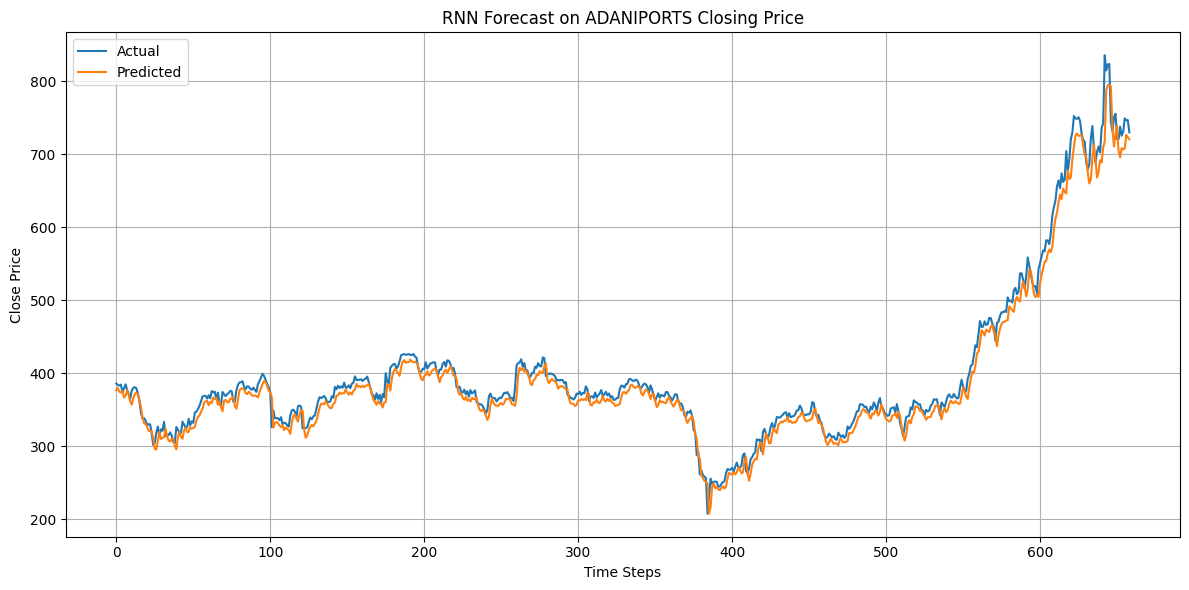

In [ ]:
# Retrain the best model
model = build_rnn_model(best_params['units'])
model.fit(X_train_rnn, y_train,
          epochs=best_params['epochs'],
          batch_size=best_params['batch_size'],
          verbose=0)

# Forecast on test
predictions = model.predict(X_test_rnn)

# Inverse transform predictions
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))
predictions_inv = scaler.inverse_transform(predictions)

# Plot
plt.figure(figsize=(12, 6))
plt.plot(y_test_inv, label='Actual')
plt.plot(predictions_inv, label='Predicted')
plt.title("RNN Forecast on ADANIPORTS Closing Price")
plt.xlabel("Time Steps")
plt.ylabel("Close Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()